In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler,PowerTransformer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading of Data

In [2]:
location=r'D:\Velocity Corporate Training\Python\Databases\Finance Project\loan.csv'
df=pd.read_csv(location)
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36 months,10.65,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,83.7,9.0,0,26.0,verified
1,2500,60 months,15.27,0.0,RENT,30000.0,car,GA,1.00,0.0,9.4,4.0,1,12.0,verified
2,2400,36 months,15.96,10.0,RENT,12252.0,small_business,IL,8.72,0.0,98.5,10.0,0,10.0,not verified
3,10000,36 months,13.49,10.0,RENT,49200.0,other,CA,20.00,0.0,21.0,37.0,0,15.0,verified
4,5000,36 months,7.90,3.0,RENT,36000.0,wedding,AZ,11.20,0.0,28.3,12.0,0,7.0,verified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
loan_amnt                163987 non-null int64
term                     163987 non-null object
int_rate                 163987 non-null float64
emp_length               158183 non-null float64
home_ownership           163987 non-null object
annual_inc               163983 non-null float64
purpose                  163987 non-null object
addr_state               163987 non-null object
dti                      163987 non-null float64
delinq_2yrs              163958 non-null float64
revol_util               163794 non-null float64
total_acc                163958 non-null float64
bad_loan                 163987 non-null int64
longest_credit_length    163958 non-null float64
verification_status      163987 non-null object
dtypes: float64(8), int64(2), object(5)
memory usage: 18.8+ MB


In [4]:
df.describe()

,loan_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length
count,163987.000000,163987.000000,158183.000000,1.639830e+05,163987.000000,163958.000000,163794.000000,163958.000000,163987.000000,163958.000000
mean,13074.169141,13.715904,5.684353,7.191567e+04,15.881530,0.227357,54.079173,24.579734,0.183039,14.854274
std,7993.556189,4.391940,3.610664,5.907092e+04,7.587668,0.694168,25.285367,11.685190,0.386700,6.947733
min,500.000000,5.420000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7000.000000,10.650000,2.000000,4.500000e+04,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000
50%,11325.000000,13.490000,6.000000,6.100000e+04,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000
75%,18000.000000,16.320000,10.000000,8.500000e+04,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000
max,35000.000000,26.060000,10.000000,7.141778e+06,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000


In [5]:
#Remove 'month' from term

df['term']=df['term'].replace({'36 months':36,'60 months':60})

In [6]:
# Finding Categorical Columns
categorical_feature_mask = df.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['home_ownership', 'purpose', 'addr_state', 'verification_status']


In [7]:
# Finding Numerical Columns
numerical_feature_mask = df.dtypes!=object

# filter categorical columns using mask and turn it into a list
numerical_cols = df.columns[numerical_feature_mask].tolist()
print(numerical_cols)

['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'bad_loan', 'longest_credit_length']


# Handling Missing Values

In [8]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
emp_length               5804
home_ownership              0
annual_inc                  4
purpose                     0
addr_state                  0
dti                         0
delinq_2yrs                29
revol_util                193
total_acc                  29
bad_loan                    0
longest_credit_length      29
verification_status         0
dtype: int64

In [9]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mean())
df['emp_length'].isnull().sum()

0

In [10]:
df['annual_inc']=df['annual_inc'].fillna(df['annual_inc'].mean())
df['annual_inc'].isnull().sum()

0

In [11]:
df['delinq_2yrs']=df['delinq_2yrs'].fillna(df['delinq_2yrs'].mode()[0])
df['delinq_2yrs'].isnull().sum()

0

In [12]:
df['revol_util']=df['revol_util'].fillna(df['revol_util'].median())
df['revol_util'].isnull().sum()

0

In [13]:
df['total_acc']=df['total_acc'].fillna(df['total_acc'].median())
df['total_acc'].isnull().sum()

0

In [14]:
df['longest_credit_length']=df['longest_credit_length'].fillna(df['longest_credit_length'].mode()[0])
df['longest_credit_length'].isnull().sum()

0

In [15]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
emp_length               0
home_ownership           0
annual_inc               0
purpose                  0
addr_state               0
dti                      0
delinq_2yrs              0
revol_util               0
total_acc                0
bad_loan                 0
longest_credit_length    0
verification_status      0
dtype: int64

# Categorical Columns to Numeric :- Label Encoding

In [16]:
#'home_ownership', 'purpose', 'addr_state', 'verification_status'

In [17]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [18]:
# Encode labels in column 'home_ownership'. 
df['home_ownership']= label_encoder.fit_transform(df['home_ownership']) 
  
df['home_ownership'].unique()

array([5, 4, 1, 3, 2, 0], dtype=int64)

In [19]:
# Encode labels in column 'purpose'. 
df['purpose']= label_encoder.fit_transform(df['purpose']) 
  
df['purpose'].unique()

array([ 1,  0, 11,  9, 13,  2,  4,  6,  7,  8, 12,  5, 10,  3],
      dtype=int64)

In [20]:
# Encode labels in column 'addr_state'. 
df['addr_state']= label_encoder.fit_transform(df['addr_state']) 
  
df['addr_state'].unique()

array([ 3, 10, 14,  4, 42, 44, 24,  6, 43,  9, 33, 37, 23, 30, 36, 17, 34,
       39, 38, 18, 19, 46, 47,  1, 32,  5, 20, 48, 45, 22,  7, 40, 27,  2,
       16, 31, 11,  0, 35, 26, 49, 29,  8, 25, 41, 12, 28, 13, 15, 21],
      dtype=int64)

In [21]:
# Encode labels in column 'addr_state'. 
df['addr_state']= label_encoder.fit_transform(df['addr_state']) 
  
df['addr_state'].unique()

array([ 3, 10, 14,  4, 42, 44, 24,  6, 43,  9, 33, 37, 23, 30, 36, 17, 34,
       39, 38, 18, 19, 46, 47,  1, 32,  5, 20, 48, 45, 22,  7, 40, 27,  2,
       16, 31, 11,  0, 35, 26, 49, 29,  8, 25, 41, 12, 28, 13, 15, 21],
      dtype=int64)

In [22]:
# Encode labels in column 'verification_status'. 
df['verification_status']= label_encoder.fit_transform(df['verification_status']) 
  
df['verification_status'].unique()

array([1, 0], dtype=int64)

In [23]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
0,5000,36,10.65,10.0,5,24000.0,1,3,27.65,0.0,83.7,9.0,0,26.0,1
1,2500,60,15.27,0.0,5,30000.0,0,10,1.00,0.0,9.4,4.0,1,12.0,1
2,2400,36,15.96,10.0,5,12252.0,11,14,8.72,0.0,98.5,10.0,0,10.0,0
3,10000,36,13.49,10.0,5,49200.0,9,4,20.00,0.0,21.0,37.0,0,15.0,1
4,5000,36,7.90,3.0,5,36000.0,13,3,11.20,0.0,28.3,12.0,0,7.0,1


# Converting acc_inc into log

In [24]:
df['annual_inc']=np.log1p(df['annual_inc'])

Text(0.5, 1.0, 'Annual income plot with Reciprocal transform')

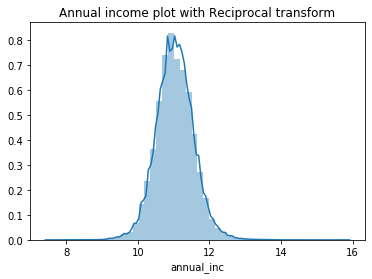

In [25]:
sns.distplot(df['annual_inc'])
plt.title('Annual income plot with Reciprocal transform')

In [26]:
df.describe()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,revol_util,total_acc,bad_loan,longest_credit_length,verification_status
count,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000,163987.000000
mean,13074.169141,40.981419,13.715904,5.684353,2.970431,11.035689,3.005641,21.996140,15.881530,0.227317,54.081198,24.579454,0.183039,14.853769,0.639270
std,7993.556189,9.733453,4.391940,3.546192,1.935654,0.525164,2.777648,14.895238,7.587668,0.694113,25.270552,11.684176,0.386700,6.947222,0.480214
min,500.000000,36.000000,5.420000,0.000000,0.000000,7.548029,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,7000.000000,36.000000,10.650000,2.000000,1.000000,10.714440,2.000000,6.000000,10.230000,0.000000,35.600000,16.000000,0.000000,10.000000,0.000000
50%,11325.000000,36.000000,13.490000,5.684353,4.000000,11.018646,2.000000,22.000000,15.620000,0.000000,55.800000,23.000000,0.000000,14.000000,1.000000
75%,18000.000000,36.000000,16.320000,10.000000,5.000000,11.350418,2.000000,34.000000,21.260000,0.000000,74.200000,31.000000,0.000000,18.000000,1.000000
max,35000.000000,60.000000,26.060000,10.000000,5.000000,15.781472,13.000000,49.000000,39.990000,29.000000,150.700000,118.000000,1.000000,65.000000,1.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163987 entries, 0 to 163986
Data columns (total 15 columns):
loan_amnt                163987 non-null int64
term                     163987 non-null int64
int_rate                 163987 non-null float64
emp_length               163987 non-null float64
home_ownership           163987 non-null int32
annual_inc               163987 non-null float64
purpose                  163987 non-null int32
addr_state               163987 non-null int64
dti                      163987 non-null float64
delinq_2yrs              163987 non-null float64
revol_util               163987 non-null float64
total_acc                163987 non-null float64
bad_loan                 163987 non-null int64
longest_credit_length    163987 non-null float64
verification_status      163987 non-null int32
dtypes: float64(8), int32(3), int64(4)
memory usage: 16.9 MB


In [28]:
df=df.drop(['addr_state','dti','revol_util','total_acc','delinq_2yrs'],axis=1)

In [29]:
df.head()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,bad_loan,longest_credit_length,verification_status
0,5000,36,10.65,10.0,5,10.085851,1,0,26.0,1
1,2500,60,15.27,0.0,5,10.308986,0,1,12.0,1
2,2400,36,15.96,10.0,5,9.413526,11,0,10.0,0
3,10000,36,13.49,10.0,5,10.803669,9,0,15.0,1
4,5000,36,7.90,3.0,5,10.491302,13,0,7.0,1


# Train, Test Splitting of data

In [30]:
from sklearn.model_selection import train_test_split
x = df.drop(['bad_loan'], axis = 1)
y = df.bad_loan
x = PowerTransformer().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

# Decision Tree

In [31]:
from sklearn import metrics
from sklearn import tree

dtree = tree.DecisionTreeClassifier(random_state=17)
dtree = dtree.fit(x_train, y_train)

dtree_pred = dtree.predict(x_test)

dtree_accuracy = metrics.accuracy_score(y_test, dtree_pred)
print(dtree_accuracy)

dtree_precision=metrics.precision_score(y_test, dtree_pred,pos_label=0)
print(dtree_precision)

dtree_recall=metrics.recall_score(y_test, dtree_pred,pos_label=0)
print(dtree_recall)

dtree_f1_score= metrics.f1_score(y_test, dtree_pred,pos_label=0)
print(dtree_f1_score)

print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

0.7112019025550338
0.832812179618618
0.8087261685499527
0.8205924691264491
[[32493  7685]
 [ 6523  2496]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82     40178
           1       0.25      0.28      0.26      9019

    accuracy                           0.71     49197
   macro avg       0.54      0.54      0.54     49197
weighted avg       0.73      0.71      0.72     49197



# Decision Tree with Cross Validation

In [32]:
from sklearn.model_selection import cross_val_score

dtree_cross_val_acc = cross_val_score(dtree, x, y, cv=10, scoring='accuracy')

dtree_cv_accuracy = dtree_cross_val_acc.mean()
print(dtree_cv_accuracy)

dtree_cross_val_pre = cross_val_score(dtree, x, y, cv=10, scoring='precision_macro')
dtree_cv_precision = dtree_cross_val_pre.mean()
print(dtree_cv_precision)

dtree_cross_val_re = cross_val_score(dtree, x, y, cv=10, scoring='recall_macro')
dtree_cv_recall = dtree_cross_val_re.mean()
print(dtree_cv_recall)

dtree_cross_val_f1 = cross_val_score(dtree, x, y, cv=10, scoring='f1_macro')
dtree_cv_f1_score = dtree_cross_val_f1.mean()
print(dtree_cv_f1_score)


0.7077267626698107
0.5325077101595219
0.5352319207851552
0.5328115683396428


# Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

Nb = GaussianNB()
Nb.fit(x_train,y_train)
Nb_pred= Nb.predict(x_test)

Nb_accuracy = metrics.accuracy_score(y_test, Nb_pred)
print(Nb_accuracy)

Nb_precision=metrics.precision_score(y_test, Nb_pred,pos_label=0)
print(Nb_precision)

Nb_recall=metrics.recall_score(y_test, Nb_pred,pos_label=0)
print(Nb_recall)

Nb_f1_score= metrics.f1_score(y_test, Nb_pred,pos_label=0)
print(Nb_f1_score)

print(confusion_matrix(y_test,Nb_pred))
print(classification_report(y_test,Nb_pred))

0.7823241254548041
0.8413687649143943
0.9038777440390263
0.8715038216484083
[[36316  3862]
 [ 6847  2172]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     40178
           1       0.36      0.24      0.29      9019

    accuracy                           0.78     49197
   macro avg       0.60      0.57      0.58     49197
weighted avg       0.75      0.78      0.76     49197



# Naive Bayes with cross Validation

In [34]:
from sklearn.model_selection import cross_val_score

Nb_cross_val = cross_val_score(Nb, x, y, cv=10, scoring='accuracy')

Nb_cv_accuracy = Nb_cross_val.mean()
print(Nb_cv_accuracy)

Nb_cross_val_pre = cross_val_score(Nb, x, y, cv=10, scoring='precision_macro')
Nb_cv_precision = Nb_cross_val_pre.mean()
print(Nb_cv_precision)

Nb_cross_val_re = cross_val_score(Nb, x, y, cv=10, scoring='recall_macro')
Nb_cv_recall = Nb_cross_val_re.mean()
print(Nb_cv_recall)

Nb_cross_val_f1 = cross_val_score(Nb, x, y, cv=10, scoring='f1_macro')
Nb_cv_f1_score = Nb_cross_val_f1.mean()
print(Nb_cv_f1_score)


0.7794029168862633
0.6006984833333151
0.5709710865019583
0.5757817910714109


# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rnd_for = RandomForestClassifier()
rnd_for.fit(x_train, y_train)
rnd_for_pred = rnd_for.predict(x_test)
rnd_for_accuracy = metrics.accuracy_score(y_test, rnd_for_pred)
print(rnd_for_accuracy)

rnd_for_precision=metrics.precision_score(y_test, rnd_for_pred,pos_label=0)
print(rnd_for_precision)

rnd_for_recall=metrics.recall_score(y_test, rnd_for_pred,pos_label=0)
print(rnd_for_recall)

rnd_for_f1_score= metrics.f1_score(y_test, rnd_for_pred,pos_label=0)
print(rnd_for_f1_score)

print(confusion_matrix(y_test,rnd_for_pred))
print(classification_report(y_test,rnd_for_pred))

0.8028538325507653
0.8243343903632919
0.9640350440539599
0.8887282739631733
[[38733  1445]
 [ 8254   765]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     40178
           1       0.35      0.08      0.14      9019

    accuracy                           0.80     49197
   macro avg       0.59      0.52      0.51     49197
weighted avg       0.74      0.80      0.75     49197



# Random Forest with Classification

In [36]:
rnd_for_cross_val = cross_val_score(rnd_for, x, y, cv=10, scoring='accuracy')
rnd_for_cv_accuracy = rnd_for_cross_val.mean()
print(rnd_for_cv_accuracy)

rnd_for_cross_val_pre = cross_val_score(rnd_for, x, y, cv=10, scoring='precision_macro')
rnd_for_cv_precision = rnd_for_cross_val_pre.mean()
print(rnd_for_cv_precision)

rnd_for_cross_val_re = cross_val_score(rnd_for, x, y, cv=10, scoring='recall_macro')
rnd_for_cv_recall = rnd_for_cross_val_re.mean()
print(rnd_for_cv_recall)

rnd_for_cross_val_f1 = cross_val_score(rnd_for, x, y, cv=10, scoring='f1_macro')
rnd_for_cv_f1_score = rnd_for_cross_val_f1.mean()
print(rnd_for_cv_f1_score)

0.8028989540637943
0.5829655104584249
0.5227567235199273
0.5098007370832112


# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
log_pred = log.predict(x_test)
log_accuracy = metrics.accuracy_score(y_test, log_pred)
print(log_accuracy)

log_precision=metrics.precision_score(y_test, log_pred,pos_label=0)
print(log_precision)

log_recall=metrics.recall_score(y_test, log_pred,pos_label=0)
print(log_recall)

log_f1_score= metrics.f1_score(y_test, log_pred,pos_label=0)
print(log_f1_score)

print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))

0.8161066731711283
0.8192333723004984
0.994200806411469
0.898276307948323
[[39945   233]
 [ 8814   205]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     40178
           1       0.47      0.02      0.04      9019

    accuracy                           0.82     49197
   macro avg       0.64      0.51      0.47     49197
weighted avg       0.75      0.82      0.74     49197



# Logistic Regression with Cross validation

In [38]:
log_cross_val = cross_val_score(log, x, y, cv=10, scoring='accuracy')
log_cv_accuracy = log_cross_val.mean()
print(log_cv_accuracy)

log_cross_val_pre = cross_val_score(log, x, y, cv=10, scoring='precision_macro')
log_cv_precision = log_cross_val_pre.mean()
print(log_cv_precision)

log_cross_val_re = cross_val_score(log, x, y, cv=10, scoring='recall_macro')
log_cv_recall = log_cross_val_re.mean()
print(log_cv_recall)

log_cross_val_f1 = cross_val_score(log, x, y, cv=10, scoring='f1_macro')
log_cv_f1_score = log_cross_val_f1.mean()
print(log_cv_f1_score)


0.8160890292664822
0.6712557615189115
0.5081264931455094
0.4699606519334137


# Adaboost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


Ada_model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=50)
Ada_model.fit(x_train,y_train)
ada_pred=Ada_model.predict(x_test)
ada_accuracy = metrics.accuracy_score(y_test, ada_pred)
print(ada_accuracy)

ada_precision=metrics.precision_score(y_test, ada_pred,pos_label=0)
print(ada_precision)

ada_recall=metrics.recall_score(y_test, ada_pred,pos_label=0)
print(ada_recall)

ada_f1_score= metrics.f1_score(y_test, ada_pred,pos_label=0)
print(ada_f1_score)

print(confusion_matrix(y_test,ada_pred))
print(classification_report(y_test,ada_pred))

0.8167774457792142
0.8192117015610276
0.9952959330977151
0.8987099964041713
[[39989   189]
 [ 8825   194]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     40178
           1       0.51      0.02      0.04      9019

    accuracy                           0.82     49197
   macro avg       0.66      0.51      0.47     49197
weighted avg       0.76      0.82      0.74     49197



# Adaboost with cross Validation

In [40]:
ada_cross_val = cross_val_score(Ada_model, x, y, cv=10, scoring='accuracy')
ada_cv_accuracy = log_cross_val.mean()
print(ada_cv_accuracy)

ada_cross_val_pre = cross_val_score(Ada_model, x, y, cv=10, scoring='precision_macro')
ada_cv_precision = ada_cross_val_pre.mean()
print(ada_cv_precision)

ada_cross_val_re = cross_val_score(Ada_model, x, y, cv=10, scoring='recall_macro')
ada_cv_recall = ada_cross_val_re.mean()
print(ada_cv_recall)

ada_cross_val_f1 = cross_val_score(Ada_model, x, y, cv=10, scoring='f1_macro')
ada_cv_f1_score = ada_cross_val_f1.mean()
print(ada_cv_f1_score)


0.8160890292664822
0.6432622703971635
0.5067434930857807
0.4669809488539549


# KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(knn_accuracy)

knn_precision=metrics.precision_score(y_test, knn_pred,pos_label=0)
print(knn_precision)

knn_recall=metrics.recall_score(y_test, knn_pred,pos_label=0)
print(knn_recall)

knn_f1_score= metrics.f1_score(y_test, knn_pred,pos_label=0)
print(knn_f1_score)

print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

0.8153749212350346
0.8199271559972838
0.991736771367415
0.8976851591101098
[[39846   332]
 [ 8751   268]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     40178
           1       0.45      0.03      0.06      9019

    accuracy                           0.82     49197
   macro avg       0.63      0.51      0.48     49197
weighted avg       0.75      0.82      0.74     49197



# KNN with Cross Validation

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_cross_val = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
knn_cv_accuracy = knn_cross_val.mean()
print(knn_cv_accuracy)

knn_cross_val_pre = cross_val_score(knn, x, y, cv=10, scoring='precision_macro')
knn_cv_precision = knn_cross_val_pre.mean()
print(knn_cv_precision)

knn_cross_val_re = cross_val_score(knn, x, y, cv=10, scoring='recall_macro')
knn_cv_recall = knn_cross_val_re.mean()
print(knn_cv_recall)

knn_cross_val_f1 = cross_val_score(knn, x, y, cv=10, scoring='f1_macro')
knn_cv_f1_score = knn_cross_val_f1.mean()
print(knn_cv_f1_score)

0.8153146033293588
0.6344854919698412
0.5106771455714549
0.47680349164140956


# SVM

In [43]:
# from sklearn.svm import SVC
# svm = SVC(gamma='auto',kernel='rbf')
# svm.fit(x_train, y_train)
# svm_pred = svm.predict(x_test)
# svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
# print(svm_accuracy)

# SVM with Cross Validation

In [44]:
# svm_cross_val = cross_val_score(svm, x, y, cv=10, scoring='accuracy')
# svm_cv_accuracy = svm_cross_val.mean()
# print(svm_cv_accuracy)

# Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

Grad_boost = GradientBoostingClassifier()
Grad_boost.fit(x_train, y_train)
Grad_boost_pred = Grad_boost.predict(x_test)
Grad_boost_accuracy = metrics.accuracy_score(y_test, Grad_boost_pred)
print(Grad_boost_accuracy)

Grad_boost_precision=metrics.precision_score(y_test, Grad_boost_pred,pos_label=0)
print(Grad_boost_precision)

Grad_boost_recall=metrics.recall_score(y_test, Grad_boost_pred,pos_label=0)
print(Grad_boost_recall)

Grad_boost_f1_score= metrics.f1_score(y_test, Grad_boost_pred,pos_label=0)
print(Grad_boost_f1_score)

print(confusion_matrix(y_test,Grad_boost_pred))
print(classification_report(y_test,Grad_boost_pred))

0.8174482183873001
0.8193207639869803
0.9961421673552691
0.8991204915362756
[[40023   155]
 [ 8826   193]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     40178
           1       0.55      0.02      0.04      9019

    accuracy                           0.82     49197
   macro avg       0.69      0.51      0.47     49197
weighted avg       0.77      0.82      0.74     49197



# Gradient Boosting Classifier with Cross Validation

In [46]:
Grad_boost_cross_val = cross_val_score(Grad_boost, x, y, cv=10, scoring='accuracy')
Grad_boost_cv_accuracy = Grad_boost_cross_val.mean()
print(Grad_boost_cv_accuracy)

Grad_boost_cross_val_pre = cross_val_score(Grad_boost, x, y, cv=10, scoring='precision_macro')
Grad_boost_cv_precision = Grad_boost_cross_val_pre.mean()
print(Grad_boost_cv_precision)

Grad_boost_cross_val_re = cross_val_score(Grad_boost, x, y, cv=10, scoring='recall_macro')
Grad_boost_cv_recall = Grad_boost_cross_val_re.mean()
print(Grad_boost_cv_recall)

Grad_boost_cross_val_f1 = cross_val_score(Grad_boost, x, y, cv=10, scoring='f1_macro')
Grad_boost_cv_f1_score = Grad_boost_cross_val_f1.mean()
print(Grad_boost_cv_f1_score)

0.8167537656727273
0.6677670615518074
0.5065425025930688
0.4658501808075869


# Multilayer Perceptron

In [47]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=1, max_iter=200)
MLP.fit(x_train, y_train)
MLP_pred = MLP.predict(x_test)
MLP_accuracy = metrics.accuracy_score(y_test, MLP_pred)
print(MLP_accuracy)

MLP_precision=metrics.precision_score(y_test, MLP_pred,pos_label=0)
print(MLP_precision)

MLP_recall=metrics.recall_score(y_test, MLP_pred,pos_label=0)
print(MLP_recall)

MLP_f1_score= metrics.f1_score(y_test, MLP_pred,pos_label=0)
print(MLP_f1_score)

print(confusion_matrix(y_test,MLP_pred))
print(classification_report(y_test,MLP_pred))

0.815700144317743
0.8209768276829746
0.9902683060381303
0.8977109915276227
[[39787   391]
 [ 8676   343]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90     40178
           1       0.47      0.04      0.07      9019

    accuracy                           0.82     49197
   macro avg       0.64      0.51      0.48     49197
weighted avg       0.76      0.82      0.75     49197



# Multilayer Perceptron with Cross Validation

In [48]:
MLP_cross_val = cross_val_score(MLP, x, y, cv=10, scoring='accuracy')
MLP_cv_accuracy = MLP_cross_val.mean()
print(MLP_cv_accuracy)

MLP_cross_val_pre = cross_val_score(MLP, x, y, cv=10, scoring='precision_macro')
MLP_cv_precision = MLP_cross_val_pre.mean()
print(MLP_cv_precision)

MLP_cross_val_re = cross_val_score(MLP, x, y, cv=10, scoring='recall_macro')
MLP_cv_recall = MLP_cross_val_re.mean()
print(MLP_cv_recall)

MLP_cross_val_f1 = cross_val_score(MLP, x, y, cv=10, scoring='f1_macro')
MLP_cv_f1_score = MLP_cross_val_f1.mean()
print(MLP_cv_f1_score)

0.8165220163360993
0.6435958326044626
0.509088973770702
0.47203470681547943


# Accuracy Comparison

In [49]:
no_cv_acc = [dtree_accuracy,Nb_accuracy, rnd_for_accuracy, log_accuracy,ada_accuracy,knn_accuracy,Grad_boost_accuracy,MLP_accuracy]
with_cv_acc = [dtree_cv_accuracy,Nb_cv_accuracy, rnd_for_cv_accuracy, log_cv_accuracy,ada_cv_accuracy,knn_cv_accuracy,Grad_boost_cv_accuracy,MLP_cv_accuracy]

no_cv_pre = [dtree_precision,Nb_precision, rnd_for_precision, log_precision,ada_precision,knn_precision,Grad_boost_precision,MLP_precision]
with_cv_pre = [dtree_cv_precision,Nb_cv_precision, rnd_for_cv_precision, log_cv_precision,ada_cv_precision,knn_cv_precision,Grad_boost_cv_precision,MLP_cv_precision]

no_cv_re = [dtree_recall,Nb_recall, rnd_for_recall, log_recall,ada_recall,knn_recall,Grad_boost_recall,MLP_recall]
with_cv_re = [dtree_cv_recall,Nb_cv_recall, rnd_for_cv_recall, log_cv_recall,ada_cv_recall,knn_cv_recall,Grad_boost_cv_recall,MLP_cv_recall]

no_cv_f1 = [dtree_f1_score,Nb_f1_score, rnd_for_f1_score, log_f1_score,ada_f1_score,knn_f1_score,Grad_boost_f1_score,MLP_f1_score]
with_cv_f1 = [dtree_cv_f1_score,Nb_cv_f1_score, rnd_for_cv_f1_score, log_cv_f1_score,ada_cv_f1_score,knn_cv_f1_score,Grad_boost_cv_f1_score,MLP_cv_f1_score]

In [50]:
accuracy = {'Without CV Acc': no_cv_acc,'With CV acc': with_cv_acc,'Without CV Pre': no_cv_pre,'With CV Pre': with_cv_pre,'Without CV Recall': no_cv_re,'With CV Recall': with_cv_re,'Without CV F1': no_cv_f1,'With CV F1': with_cv_f1}

In [51]:
accuracy_chart = pd.DataFrame(accuracy, index = ['DTREE', 'Naive Bayes', 'RND_FOR', 'LOG_REG','ADABOOST','KNN','Gradient Boosting','Multilayer Perceptron'])

In [52]:
print(accuracy_chart)

                        Without CV Acc  With CV acc  Without CV Pre  \
DTREE                         0.711202     0.707727        0.832812   
Naive Bayes                   0.782324     0.779403        0.841369   
RND_FOR                       0.802854     0.802899        0.824334   
LOG_REG                       0.816107     0.816089        0.819233   
ADABOOST                      0.816777     0.816089        0.819212   
KNN                           0.815375     0.815315        0.819927   
Gradient Boosting             0.817448     0.816754        0.819321   
Multiplayer Perceptron        0.815700     0.816522        0.820977   

                        With CV Pre  Without CV Recall  With CV Recall  \
DTREE                      0.532508           0.808726        0.535232   
Naive Bayes                0.600698           0.903878        0.570971   
RND_FOR                    0.582966           0.964035        0.522757   
LOG_REG                    0.671256           0.994201        0.

In [54]:
accuracy_chart.to_excel('Loan Prediction Results with Power Transform.xlsx')